<a href="https://colab.research.google.com/github/thyeaditungson29/myDataScience/blob/main/EVDA_project22_UTS_dataFromKaggle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Import Library yang akan digunakan**

In [31]:
import os #paths to file
import numpy as np # linear algebra
import pandas as pd # data processing
import warnings# warning filter
import datetime as dt #for timestamp
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

warnings.filterwarnings('ignore')

# **2. Mengambil Data**

In [32]:
#Data diambil dari kaggle, oleh karena itu perlu menautkan kaggle dengan colabs
!pip install -q kaggle

In [33]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
  
# Then copy kaggle.json into the folder where the API expects to find it.
!mkdir -p ~/.kaggle/ && cp kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json
User uploaded file "kaggle.json" with length 72 bytes


In [35]:
!kaggle competitions download -c ashrae-energy-prediction

 94% 356M/379M [00:01<00:00, 259MB/s]
100% 379M/379M [00:01<00:00, 264MB/s]


In [36]:
!unzip ashrae-energy-prediction.zip

Archive:  ashrae-energy-prediction.zip
  inflating: building_metadata.csv   
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               
  inflating: weather_test.csv        
  inflating: weather_train.csv       


In [37]:
#Path dari masing_masing data dari Kaggle yang sudah disimpan di google colabs
meta_path = "/content/building_metadata.csv" 
pwTrain_path = "/content/train.csv"
wtTrain_path = "/content/weather_train.csv"
pwTest_path = "/content/test.csv"
wtTest_path = "/content/weather_test.csv"

In [ ]:
#Mount data dengan Pandas
df_meta = pd.read_csv(meta_path) #Dataframe Metadata_Building
df_pwTrain = pd.read_csv(pwTrain_path) #Dataframe train
df_wtTrain = pd.read_csv(wtTrain_path) #Dataframe weather train
df_pwTest = pd.read_csv(pwTest_path) #Dataframe test
df_wtTest = pd.read_csv(wtTest_path) #Dataframe weather test

# **3. Melihat informasi dari tiap data**

In [39]:
# Informasi dari data train (df_pwTrain)
df_pwTrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20216100 entries, 0 to 20216099
Data columns (total 4 columns):
 #   Column         Dtype  
---  ------         -----  
 0   building_id    int64  
 1   meter          int64  
 2   timestamp      object 
 3   meter_reading  float64
dtypes: float64(1), int64(2), object(1)
memory usage: 616.9+ MB


In [40]:
df_pwTrain.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
building_id,20216100.0,799.278000,426.913309,0.0,393.0,895.000,1179.000,1448.0
meter,20216100.0,0.662441,0.930992,0.0,0.0,0.000,1.000,3.0
meter_reading,20216100.0,2117.121076,153235.624995,0.0,18.3,78.775,267.984,21904700.0


In [41]:
df_pwTrain.head()

,building_id,meter,timestamp,meter_reading
0,0,0,2016-01-01 00:00:00,0.0
1,1,0,2016-01-01 00:00:00,0.0
2,2,0,2016-01-01 00:00:00,0.0
3,3,0,2016-01-01 00:00:00,0.0
4,4,0,2016-01-01 00:00:00,0.0


In [42]:
# Informasi dari data Metadata Bangunan (df_meta)
df_meta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1449 entries, 0 to 1448
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   site_id      1449 non-null   int64  
 1   building_id  1449 non-null   int64  
 2   primary_use  1449 non-null   object 
 3   square_feet  1449 non-null   int64  
 4   year_built   675 non-null    float64
 5   floor_count  355 non-null    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 68.0+ KB


In [43]:
df_meta.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
site_id,1449.0,6.952381,5.003432,0.0,3.0,5.0,13.0,15.0
building_id,1449.0,724.000000,418.434583,0.0,362.0,724.0,1086.0,1448.0
square_feet,1449.0,92111.776398,110769.950997,283.0,23012.0,57673.0,115676.0,875000.0
year_built,675.0,1967.957037,31.054030,1900.0,1949.0,1970.0,1995.0,2017.0
floor_count,355.0,3.740845,3.333683,1.0,1.0,3.0,5.0,26.0


In [44]:
df_meta.head()

,site_id,building_id,primary_use,square_feet,year_built,floor_count
0,0,0,Education,7432,2008.0,NaN
1,0,1,Education,2720,2004.0,NaN
2,0,2,Education,5376,1991.0,NaN
3,0,3,Education,23685,2002.0,NaN
4,0,4,Education,116607,1975.0,NaN


In [45]:
# Informasi dari Data Cuaca Train (df_wtTrain)
df_wtTrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139773 entries, 0 to 139772
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   site_id             139773 non-null  int64  
 1   timestamp           139773 non-null  object 
 2   air_temperature     139718 non-null  float64
 3   cloud_coverage      70600 non-null   float64
 4   dew_temperature     139660 non-null  float64
 5   precip_depth_1_hr   89484 non-null   float64
 6   sea_level_pressure  129155 non-null  float64
 7   wind_direction      133505 non-null  float64
 8   wind_speed          139469 non-null  float64
dtypes: float64(7), int64(1), object(1)
memory usage: 9.6+ MB


In [46]:
df_wtTrain.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
site_id,139773.0,7.478977,4.604744,0.0,3.0,7.0,11.0,15.0
air_temperature,139718.0,14.418106,10.626595,-28.9,7.2,15.0,22.2,47.2
cloud_coverage,70600.0,2.149306,2.599150,0.0,0.0,2.0,4.0,9.0
dew_temperature,139660.0,7.350158,9.790235,-35.0,0.6,8.3,14.4,26.1
precip_depth_1_hr,89484.0,0.983047,8.463678,-1.0,0.0,0.0,0.0,343.0
sea_level_pressure,129155.0,1016.158038,7.629684,968.2,1011.8,1016.4,1020.8,1045.5
wind_direction,133505.0,180.526632,111.523629,0.0,80.0,190.0,280.0,360.0
wind_speed,139469.0,3.560527,2.335874,0.0,2.1,3.1,5.0,19.0


In [47]:
df_wtTrain.head()

,site_id,timestamp,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
0,0,2016-01-01 00:00:00,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
1,0,2016-01-01 01:00:00,24.4,NaN,21.1,-1.0,1020.2,70.0,1.5
2,0,2016-01-01 02:00:00,22.8,2.0,21.1,0.0,1020.2,0.0,0.0
3,0,2016-01-01 03:00:00,21.1,2.0,20.6,0.0,1020.1,0.0,0.0
4,0,2016-01-01 04:00:00,20.0,2.0,20.0,-1.0,1020.0,250.0,2.6


**Data yang terdapat pada tiap file csv**

**train.csv/test.csv:** Berisi id bangunan, id meter, catatan waktu saat pengukuran meteran dilakukan dan pembacaan meter yang merupakan variabel target.
*   building_id — ID dari bangunan.
*   meter — Kode id meter. Dibaca sebagai {0: listrik, 1: air dingin, 2: uap, 3: air panas}. Tidak setiap bangunan memiliki semua jenis id meteran.
*   timestamp — Waktu aat pengukuran dilakukan
*   meter_reading — Variabel target. Konsumsi energi dalam kWh (atau setara)


**weather_train.csv/weather_test.csv:** Data cuaca dari stasiun metrologi yang terdekat dengan lokasi.
*   site_id- id lokasi bangunan
*   air_temperature — Suhu udara dalam derajat Celcius
*   cloud_coverage — Bagian dari langit yang tertutup awan, dalam oktas
*   dew_temperature — Suhu Dew dalam derajat Celcius
*   precip_depth_1_hr — Kedalaman curah hujan dalam Milimeter
*   sea_level_pressure — Tekanan permukaan laut dalamMilibar/hectopascals
*   wind_direction — Arah Angin (0–360)
*   wind_speed — Kecepatan Angineter per detik

**building_metadata.csv:** Metadata untuk semua bangunan di berbagai tempat.
*   site_id — id lokasi bangunan.
*   building_id — ID gedung untuk join denagn training.csv
*   primary_use — Fungsi atau kegunaan bangunan
*   square_feet — Luas bangunan
*   year_built — Tahun bangunan dibuat
*   floor_count — Jumlah lantai bangunan

# **4. Membuat data lebih ringan, mengurangi pembacaan memory, dan menggabungkan Data serta melakukan**

In [48]:
# Mengubah data menjadi format lebih ringan karena beberapa kerangka data terlalu besar dan membutuhkan waktu lama untuk dimuat
# Metode ini terinspirasi dari notebook kaggle berjudul: ASHRAE: format bulu untuk pemuatan cepat
# Proses ini terinspirasi dari tautan: https://www.kaggle.com/corochann/ashrae-feather-format-for-fast-loading

%%time
df_pwTrain.to_feather('df_pwTrain.feather')
df_pwTest.to_feather('df_pwTest.feather')

df_meta.to_feather('df_meta.feather')

df_wtTrain.to_feather('df_wtTrain.feather')
df_wtTest.to_feather('df_wtTest.feather')

CPU times: user 4.07 s, sys: 1.42 s, total: 5.48 s
Wall time: 5.08 s


In [49]:
%%time
df_pwTrain = pd.read_feather('df_pwTrain.feather')
df_pwTest = pd.read_feather('df_pwTest.feather')

df_meta = pd.read_feather('df_meta.feather')

df_wtTrain = pd.read_feather('df_wtTrain.feather')
df_wtTest = pd.read_feather('df_wtTest.feather')

CPU times: user 2.55 s, sys: 1.32 s, total: 3.87 s
Wall time: 3.03 s


In [50]:
# Fungsi ini membantu dalam mengoptimalkan memori yang digunakan oleh kerangka data dengan memodifikasi/mengubah tipe data setiap kolom.
# Metode ini terinspirasi dari notebook kaggle berjudul: load data (reduce memory usage)
# Proses ini terinspirasi dari tautan: https://www.kaggle.com/gemartin/load-data-reduce-memory-usage

def reduce_mem_usage(df, df_name):

    start_mem = df.memory_usage().sum() / 1024**2
    
    for col in df.columns:

        col_type = df[col].dtype

        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2

    print('Memory usage of {} is reduced by {:.2f} %. Usage dropped from {:.2f} MB to {:.2f} MB.'.format(df_name, (100 * (start_mem - end_mem) / start_mem), start_mem, end_mem))
    
    return df

In [51]:
df_pwTrain = reduce_mem_usage(df_pwTrain, 'Dataframe Train')
df_pwTest = reduce_mem_usage(df_pwTest, 'Dataframe Test')

df_meta = reduce_mem_usage(df_meta, 'Dataframe Metadata_Building')

df_wtTrain = reduce_mem_usage(df_wtTrain, 'Dataframe Weather Train')
df_wtTest = reduce_mem_usage(df_wtTest, 'Dataframe Weather Test')

Memory usage of Dataframe Train is reduced by 71.82 %. Usage dropped from 616.95 MB to 173.84 MB.
Memory usage of Dataframe Test is reduced by 71.82 %. Usage dropped from 1272.51 MB to 358.53 MB.
Memory usage of Dataframe Metadata_Building is reduced by 73.88 %. Usage dropped from 0.07 MB to 0.02 MB.
Memory usage of Dataframe Weather Train is reduced by 73.06 %. Usage dropped from 9.60 MB to 2.59 MB.
Memory usage of Dataframe Weather Test is reduced by 73.04 %. Usage dropped from 19.04 MB to 5.13 MB.


In [52]:
#Menggabungkan Data
#1. Menggabungkan Data Train
df_all_Train = df_pwTrain.merge(df_meta, on='building_id', how='left')
df_all_Train = df_all_Train.merge(df_wtTrain, on=['site_id', 'timestamp'], how='left')

#2. Menggabungkan Data Test
df_all_Test = df_pwTest.merge(df_meta, on='building_id', how='left')
df_all_Test = df_all_Test.merge(df_wtTest, on=['site_id', 'timestamp'], how='left')

In [53]:
#Melihat tabel dari dataframe baru
#Tabel dari df_all_Train
df_all_Train.head()

,building_id,meter,timestamp,meter_reading,site_id,primary_use,square_feet,year_built,floor_count,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
0,0,0,2016-01-01 00:00:00,0.0,0,Education,7432,2008.0,NaN,25.0,6.0,20.0,NaN,1019.5,0.0,0.0
1,1,0,2016-01-01 00:00:00,0.0,0,Education,2720,2004.0,NaN,25.0,6.0,20.0,NaN,1019.5,0.0,0.0
2,2,0,2016-01-01 00:00:00,0.0,0,Education,5376,1991.0,NaN,25.0,6.0,20.0,NaN,1019.5,0.0,0.0
3,3,0,2016-01-01 00:00:00,0.0,0,Education,23685,2002.0,NaN,25.0,6.0,20.0,NaN,1019.5,0.0,0.0
4,4,0,2016-01-01 00:00:00,0.0,0,Education,116607,1975.0,NaN,25.0,6.0,20.0,NaN,1019.5,0.0,0.0


In [54]:
#Tabel dari df_all_Test
df_all_Test.head()

,row_id,building_id,meter,timestamp,site_id,primary_use,square_feet,year_built,floor_count,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
0,0,0,0,2017-01-01 00:00:00,0,Education,7432,2008.0,NaN,17.796875,4.0,11.703125,NaN,1021.5,100.0,3.599609
1,1,1,0,2017-01-01 00:00:00,0,Education,2720,2004.0,NaN,17.796875,4.0,11.703125,NaN,1021.5,100.0,3.599609
2,2,2,0,2017-01-01 00:00:00,0,Education,5376,1991.0,NaN,17.796875,4.0,11.703125,NaN,1021.5,100.0,3.599609
3,3,3,0,2017-01-01 00:00:00,0,Education,23685,2002.0,NaN,17.796875,4.0,11.703125,NaN,1021.5,100.0,3.599609
4,4,4,0,2017-01-01 00:00:00,0,Education,116607,1975.0,NaN,17.796875,4.0,11.703125,NaN,1021.5,100.0,3.599609


In [55]:
#Melihat Bentuk gabungan dari data
print('Bentuk gabungan Data Train:',df_all_Train.shape)
print('Bentuk gabungan Data Test:', df_all_Test.shape)

Bentuk gabungan Data Train: (20216100, 16)
Bentuk gabungan Data Test: (41697600, 16)


In [56]:
#Check null values pada ddata train gabungan
df_all_Train.isnull().sum()

building_id                  0
meter                        0
timestamp                    0
meter_reading                0
site_id                      0
primary_use                  0
square_feet                  0
year_built            12127645
floor_count           16709167
air_temperature          96658
cloud_coverage         8825365
dew_temperature         100140
precip_depth_1_hr      3749023
sea_level_pressure     1231669
wind_direction         1449048
wind_speed              143676
dtype: int64

In [57]:
#Check null values pada ddata train gabungan
df_all_Test.isnull().sum()

row_id                       0
building_id                  0
meter                        0
timestamp                    0
site_id                      0
primary_use                  0
square_feet                  0
year_built            24598080
floor_count           34444320
air_temperature         221901
cloud_coverage        19542180
dew_temperature         260799
precip_depth_1_hr      7801563
sea_level_pressure     2516826
wind_direction         2978663
wind_speed              302089
dtype: int64

In [58]:
#Sebelum menganalisis lebih lanjut akan ditambahkan fitur tanggal, waktu dalam kumpulan data kami berdasarkan fitur catata waktu (timestamp) 
#yang diberikan sehingga dapat menganalisis data pada tingkat yang terperinci dan menjelajahi apakah ada pola musiman.
# Code program ini dari tautan: https://gist.github.com/vdhar1992/3fcb42a0856e10aaa647322b12ade294#file-break_datetime-py
def break_datetime(df):
  df['timestamp']= pd.to_datetime(df['timestamp'])
  df['hour']= np.uint8(df['timestamp'].dt.hour)
  df['dayofweek']= np.uint8(df['timestamp'].dt.dayofweek)
  df['month']= np.uint8(df['timestamp'].dt.month)
  df['dayofyear']= np.uint16(df['timestamp'].dt.dayofyear)
  df['day']= np.uint16(df['timestamp'].dt.day)
  df['year']= np.uint16(df['timestamp'].dt.year)
  return df


In [59]:
df_all_Train = break_datetime(df_all_Train)
df_all_Test = break_datetime(df_all_Test)

In [60]:
#Melihat Bentuk gabungan dari data setelah menambahkan fitur tanggal dan waktu
print('Bentuk gabungan Data Train:',df_all_Train.shape)
print('Bentuk gabungan Data Test:', df_all_Test.shape)

Bentuk gabungan Data Train: (20216100, 22)
Bentuk gabungan Data Test: (41697600, 22)


# **5. Melakukan Explatory Data (EDA)**
Karena ini berkaitan dengan prediksi penggunaan energi, maka EDA pertama yang dilakukan adalah terhadap data Train gabungan (df_all_Train)

In [61]:
#Target utama adalah melihat dari pembacaan meteran pada data train gabungan
df_all_Train['meter_reading'].describe()

count    2.021610e+07
mean     1.988706e+03
std      1.532159e+05
min      0.000000e+00
25%      1.830000e+01
50%      7.877500e+01
75%      2.679840e+02
max      2.190470e+07
Name: meter_reading, dtype: float64

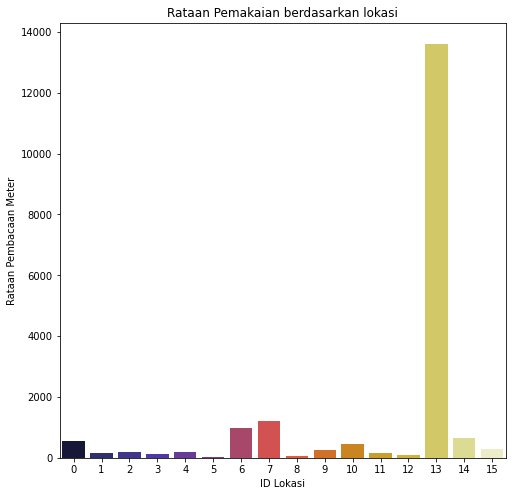

In [62]:
#Penggunaan Daya berdasarkan ID lokasi
plt.figure(figsize=(8,8))
site_df= df_all_Train.groupby(['site_id']).meter_reading.mean().reset_index()
sns.barplot(x=site_df['site_id'], y=site_df['meter_reading'], palette='CMRmap')
plt.ylabel("Rataan Pembacaan Meter")
plt.xlabel("ID Lokasi")
plt.title("Rataan Pemakaian berdasarkan lokasi")
plt.show()

Lokasi dengan ID 13 mencatat penggunaan daya rata-rata tertinggi diikuti oleh lokasi dengan ID 7, lokasi dengan ID 6. penggunaan daya terendah dicatat oleh Lokasi dengan ID 5.

Untuk data di lokasi 13 diasumsikankemungkinan ada outlier (harus dilihat lebih lanjut lewat exploratori berikutnya)

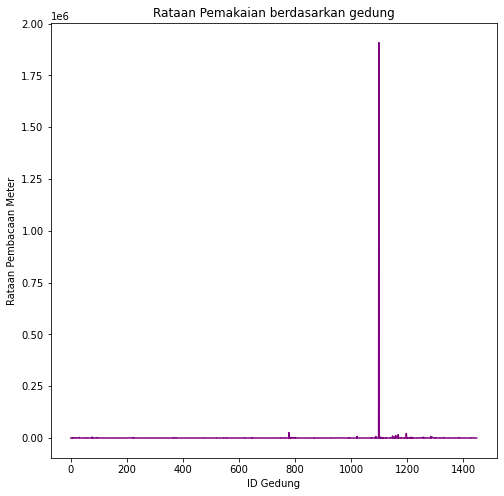

In [63]:
#Penggunaan Daya berdasarkan ID Gedung
plt.figure(figsize=(8,8))
site_df= df_all_Train.groupby(['building_id']).meter_reading.mean().reset_index()
sns.lineplot(x=site_df['building_id'], y=site_df['meter_reading'], color='purple')
plt.ylabel("Rataan Pembacaan Meter")
plt.xlabel("ID Gedung")
plt.title("Rataan Pemakaian berdasarkan gedung")
plt.show()

In [64]:
print(df_all_Train[df_all_Train.meter_reading == df_all_Train.meter_reading.max()])

         building_id  meter           timestamp  meter_reading  site_id  \
8907488         1099      2 2016-06-13 09:00:00     21904700.0       13   

        primary_use  square_feet  year_built  floor_count  air_temperature  \
8907488   Education       332884         NaN          NaN         19.40625   

         ...  precip_depth_1_hr  sea_level_pressure  wind_direction  \
8907488  ...                0.0              1014.5            50.0   

         wind_speed  hour  dayofweek  month  dayofyear  day  year  
8907488    6.199219     9          0      6        165   13  2016  

[1 rows x 22 columns]


Seperti yang dapat kita lihat dari plot di atas, pembacaan meter bervariasi di seluruh bangunan. Bangunan dengan ID 1099 memiliki lonjakan penggunaan daya yang besar dalam penggunaannya sementara banyak bangunan menggunakan energi yang sangat sedikit. Itu akan dianggap sebagai outlier. 

Karena  dianggap outlier maka pembacaan meter di bangunan dengan ID 1099 akan di hapus, setelah itu akan dilihat data selanjutnya apakah masih memiliki outlier atau tidak

In [65]:
#Fungsi plotting/tampil grafik distribusi dari tiap kolom pada dataframe
sns.set_theme()

def tampil_grafik_distribusi(dataframe, column_name):
    
    fig, ax = plt.subplots(figsize=(8, 8))
    sns.distplot(dataframe[column_name], color='red', ax = ax).set_title("Grafik Distribusi untuk {}".format(column_name), fontsize=16)
    plt.xlabel(column_name, fontsize=12)
    plt.ylabel('Density', fontsize=12)
    plt.show()

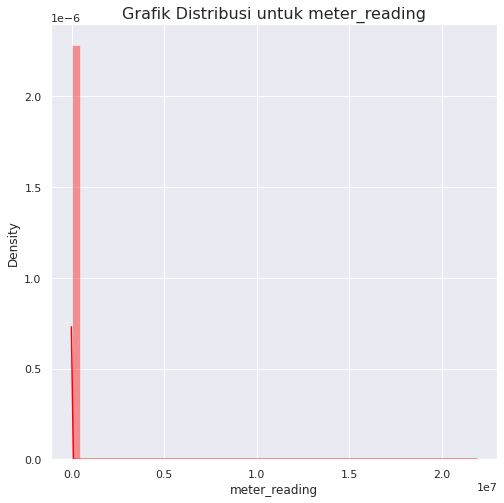

In [66]:
tampil_grafik_distribusi(df_all_Train,'meter_reading')

In [67]:
print('Skewness dari kolom Meter Reading', df_all_Train['meter_reading'].skew())

Skewness dari kolom Meter Reading 104.81131


Pada grafik terlihat data pada kolom meter_reading sangat miring(extreamly skewed) dan tidak banyak wawasan yang dapat dikumpulkan dari plot di atas tersebut. Oleh karena itu, perlu melakukan transformasi log.

In [68]:
#Melakukan transformasi log terhadap data di kolom meter_reading pada data train
df_all_Train['meter_reading']=np.log1p(df_all_Train['meter_reading'])

In [69]:
#Melihat deskripsi data dan grafik dari data meter_reading setelah transformasi log
df_all_Train['meter_reading'].describe()

count    2.021610e+07
mean     4.208398e+00
std      2.074255e+00
min      0.000000e+00
25%      2.960105e+00
50%      4.379210e+00
75%      5.594652e+00
max      1.690221e+01
Name: meter_reading, dtype: float64

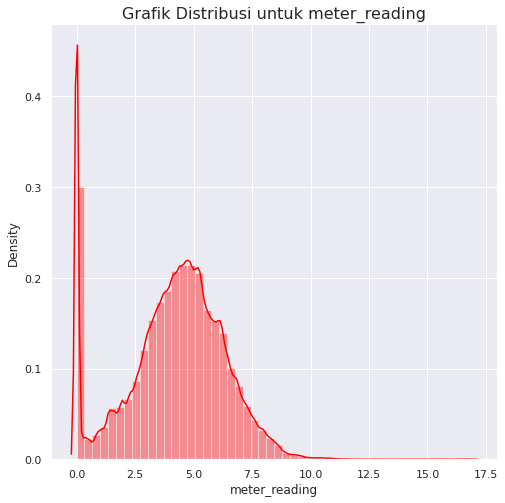

In [70]:
tampil_grafik_distribusi(df_all_Train,'meter_reading')

In [71]:
#Melihat Skewness setelah tranformasi log
print('Skewness dari kolom Meter Reading setelah transformasi log', df_all_Train['meter_reading'].skew())

Skewness dari kolom Meter Reading setelah transformasi log -0.27537704


Variabel target (meter_reading) memiliki varians yang baik sekarang, tapi masih banyak nilainya masih nol (untuk ini nanti akan dilakukan handling pada data preprocessing)

Selanjutnya kita akan coba explore penggunaan daya (pembacaan meter_reading) dari sudut pandang lain

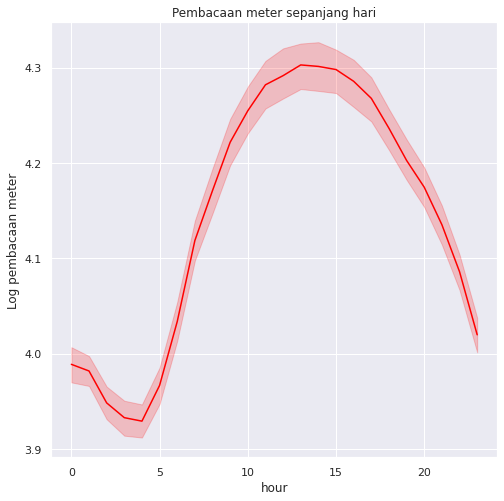

In [72]:
#Melihat rataan penggunaan daya (pembacaan meter_reading) secara harian (pada tiap jamnya)
plt.figure(figsize=(8,8))
hour_df= df_all_Train.groupby(['timestamp','hour']).meter_reading.mean().reset_index()
sns.lineplot(x=hour_df['hour'], y=hour_df['meter_reading'], color='red')
plt.ylabel("Log pembacaan meter")
plt.title("Pembacaan meter sepanjang hari")
plt.show()

Dapat diamati dari plot di atas bahwa penggunaan daya (pembacaan meter) turun dari waktu tengah malam pada sampai sekitar jam 4 pagi dan naik lagi setelah jam 6 pagi. Penggunaan per jam mencapai puncaknya pada sore hari sekitar jam 2 atau 3 sore. Perilaku ini terlihat jelas karena sebagian besar institut, industri, dan bangunan lainnya beroperasi penuh selama waktu ini.

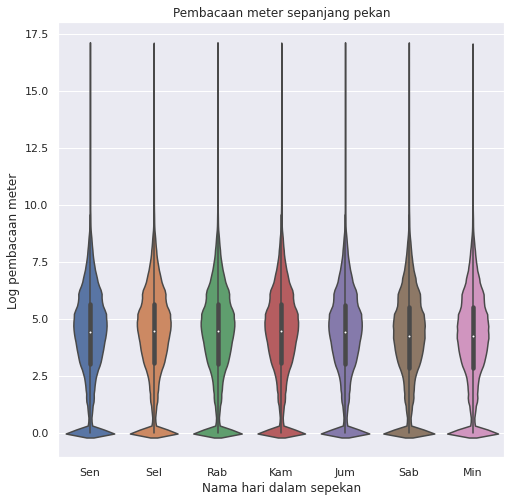

In [73]:
#Melihat rataan penggunaan daya (pembacaan meter_reading) secara pekanan (pada tiap harinya)
plt.figure(figsize=(8,8))
day_labels= ['Sen', 'Sel', 'Rab', 'Kam', 'Jum', 'Sab', 'Min']
p=sns.violinplot(x=df_all_Train['dayofweek'], y=df_all_Train['meter_reading'], pallete='muted')
p.set_xticklabels(day_labels)
plt.xlabel("Nama hari dalam sepekan")
plt.ylabel("Log pembacaan meter")
plt.title("Pembacaan meter sepanjang pekan")
plt.show()

Tidak ada banyak perbedaan dalam penggunaan sehari-hari selama sepekan.

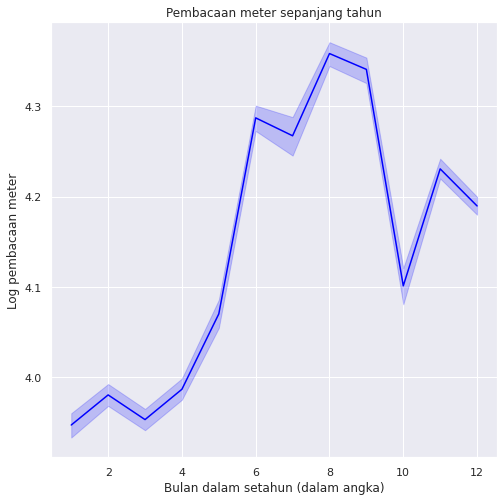

In [74]:
#Melihat rataan penggunaan daya (pembacaan meter_reading) secara tahunan (pada tiap bulannya)
plt.figure(figsize=(8,8))
month_df= df_all_Train.groupby(['timestamp','month']).meter_reading.mean().reset_index()
sns.lineplot(x=month_df['month'], y=month_df['meter_reading'], color='blue')
plt.xlabel("Bulan dalam setahun (dalam angka)")
plt.ylabel("Log pembacaan meter")
plt.title("Pembacaan meter sepanjang tahun")
plt.show()

Karena pengamatan ini pada lembaga ASHRAE yang berada di Amerika maka analisis perlakuannya berdasarkan pengelompokan musim yang ada di sana.
Konsumsi bulanan rata-rata minimal di bulan-bulan awal dan kemudian meningkat setelah April di awal musim semi. Puncaknya di bulan Agustus dan mulai turun lagi di akhir musim gugur dan awal musim dingin

In [75]:
#Untuk analisa lebih lanjut, maka kita akan memberikan nama dari tiap kategori dari meter_id, dimana {0: listrik, 1: air dingin, 2: uap, 3: air panas}
df_all_Train['meter'].replace({0: 'Listrik', 1: 'Air Dingin', 2: 'Uap', 3: 'Air Panas'}, inplace=True)

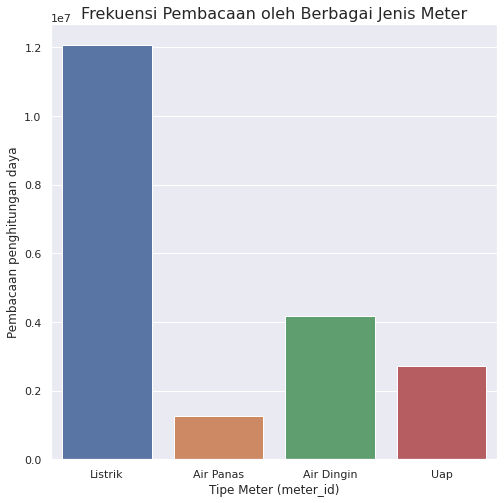

In [76]:
#Melakukan Plot frekuensi penggunaan daya (Pembacaan Meter) dan juga Rataan penggunaan daya (Pembacaan Meter) dengan nama meter_id yang sudah diubah
#1. Plot frekuensi penggunaan daya (Pembacaan Meter)
plt.figure(figsize=(8,8))
sns.countplot(x = 'meter', data = df_all_Train).set_title("Frekuensi Pembacaan oleh Berbagai Jenis Meter", fontsize=16)
plt.xlabel('Tipe Meter (meter_id)', fontsize=12)
plt.ylabel('Pembacaan penghitungan daya', fontsize=12)
plt.show()

Text(0.5, 1.0, 'Rata-rata Pembacaan oleh Berbagai Jenis Meter')

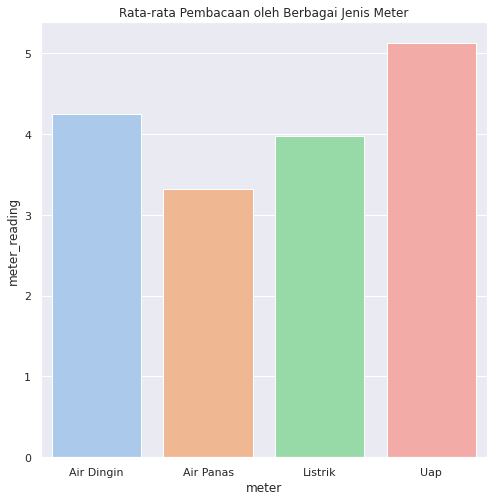

In [77]:
#2. Plot rata-rata penggunaan daya (Pembacaan Meter)
plt.figure(figsize=(8,8))
meter_df= df_all_Train.groupby('meter').meter_reading.mean().reset_index()
ax= sns.barplot(x='meter', y='meter_reading', data=meter_df, palette='pastel')
plt.title("Rata-rata Pembacaan oleh Berbagai Jenis Meter")

1.   Terlihat dari plot 1 (frekuensi penggunaan daya) berdasarkan meter_id penggunaan listrik memiliki pembacaan meter paling banyak digunakan diikuti oleh air dingin dan uap. Pembacaan terendah adalah untuk untuk air panas 

2.   Terlihat dari plot 2 (Rataan penggunaan daya) Uap adalah yang paling boros daya dan air panas adalah yang paling hemat daya.



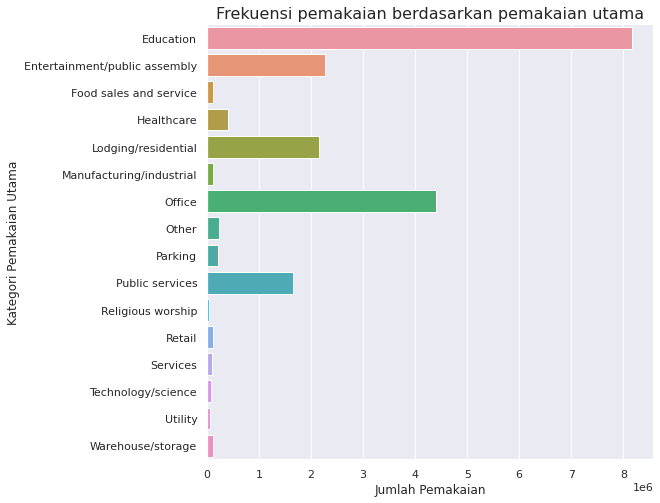

In [78]:
#Sekarang kita akan lakukan pengamatan penggunaan daya berdasarkan pemakaian utama (primary_use)
plt.figure(figsize=(8,8))
sns.countplot(y = 'primary_use', data = df_all_Train).set_title("Frekuensi pemakaian berdasarkan pemakaian utama", fontsize=16)
plt.ylabel('Kategori Pemakaian Utama', fontsize=12)
plt.xlabel('Jumlah Pemakaian', fontsize=12)
plt.show()

Dari Plot di atas terlihat bahwa penggunaan daya (pembacaan meter) paling besar oleh lembaga pendidikan diikuti oleh kantor, hiburan dan bangunan Penginapan/perumahan.

Untuk exploratory berikutnya kita akan lihat rataan penggunaan daya harian, pekanan, dan tahunan dari masing-masing pemakaian utama

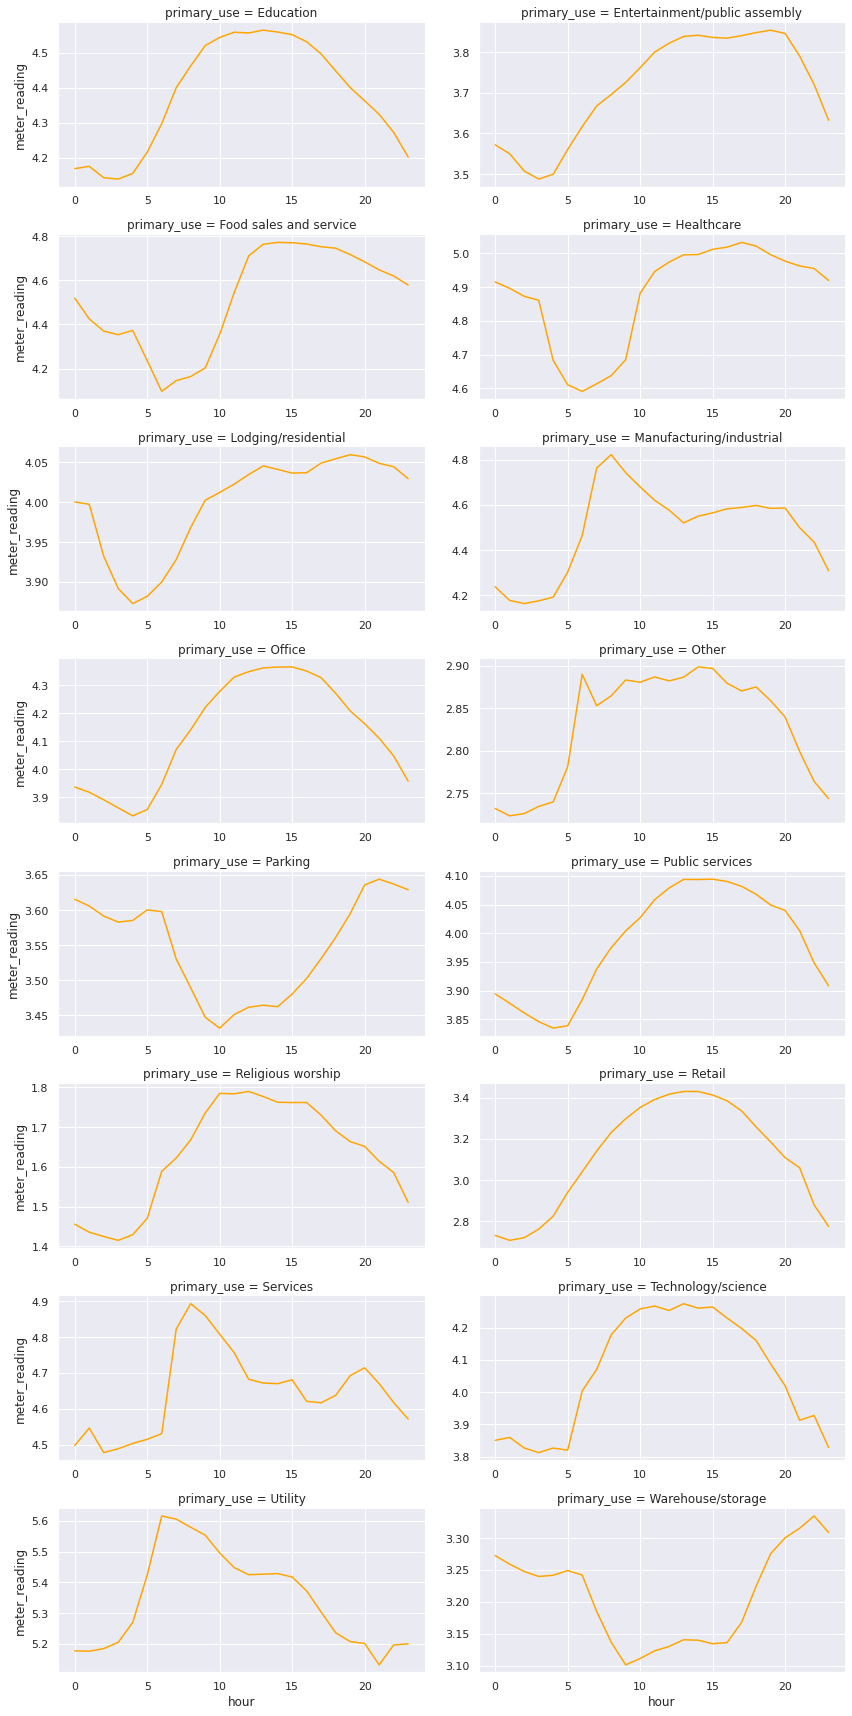

In [79]:
#Pengamatan penggunaan daya harian (dilihat dari rataan penggunaan tiap jamnya berdasarkan tipe bangunan/pemakaian utama)
hour_use_df= df_all_Train.groupby(['hour', 'primary_use']).meter_reading.mean().reset_index()
p=sns.FacetGrid(hour_use_df, col='primary_use', col_wrap=2, height=3, aspect=2, sharey=False, sharex=False)
p.map(sns.lineplot, 'hour', 'meter_reading', color='orange')
plt.show()

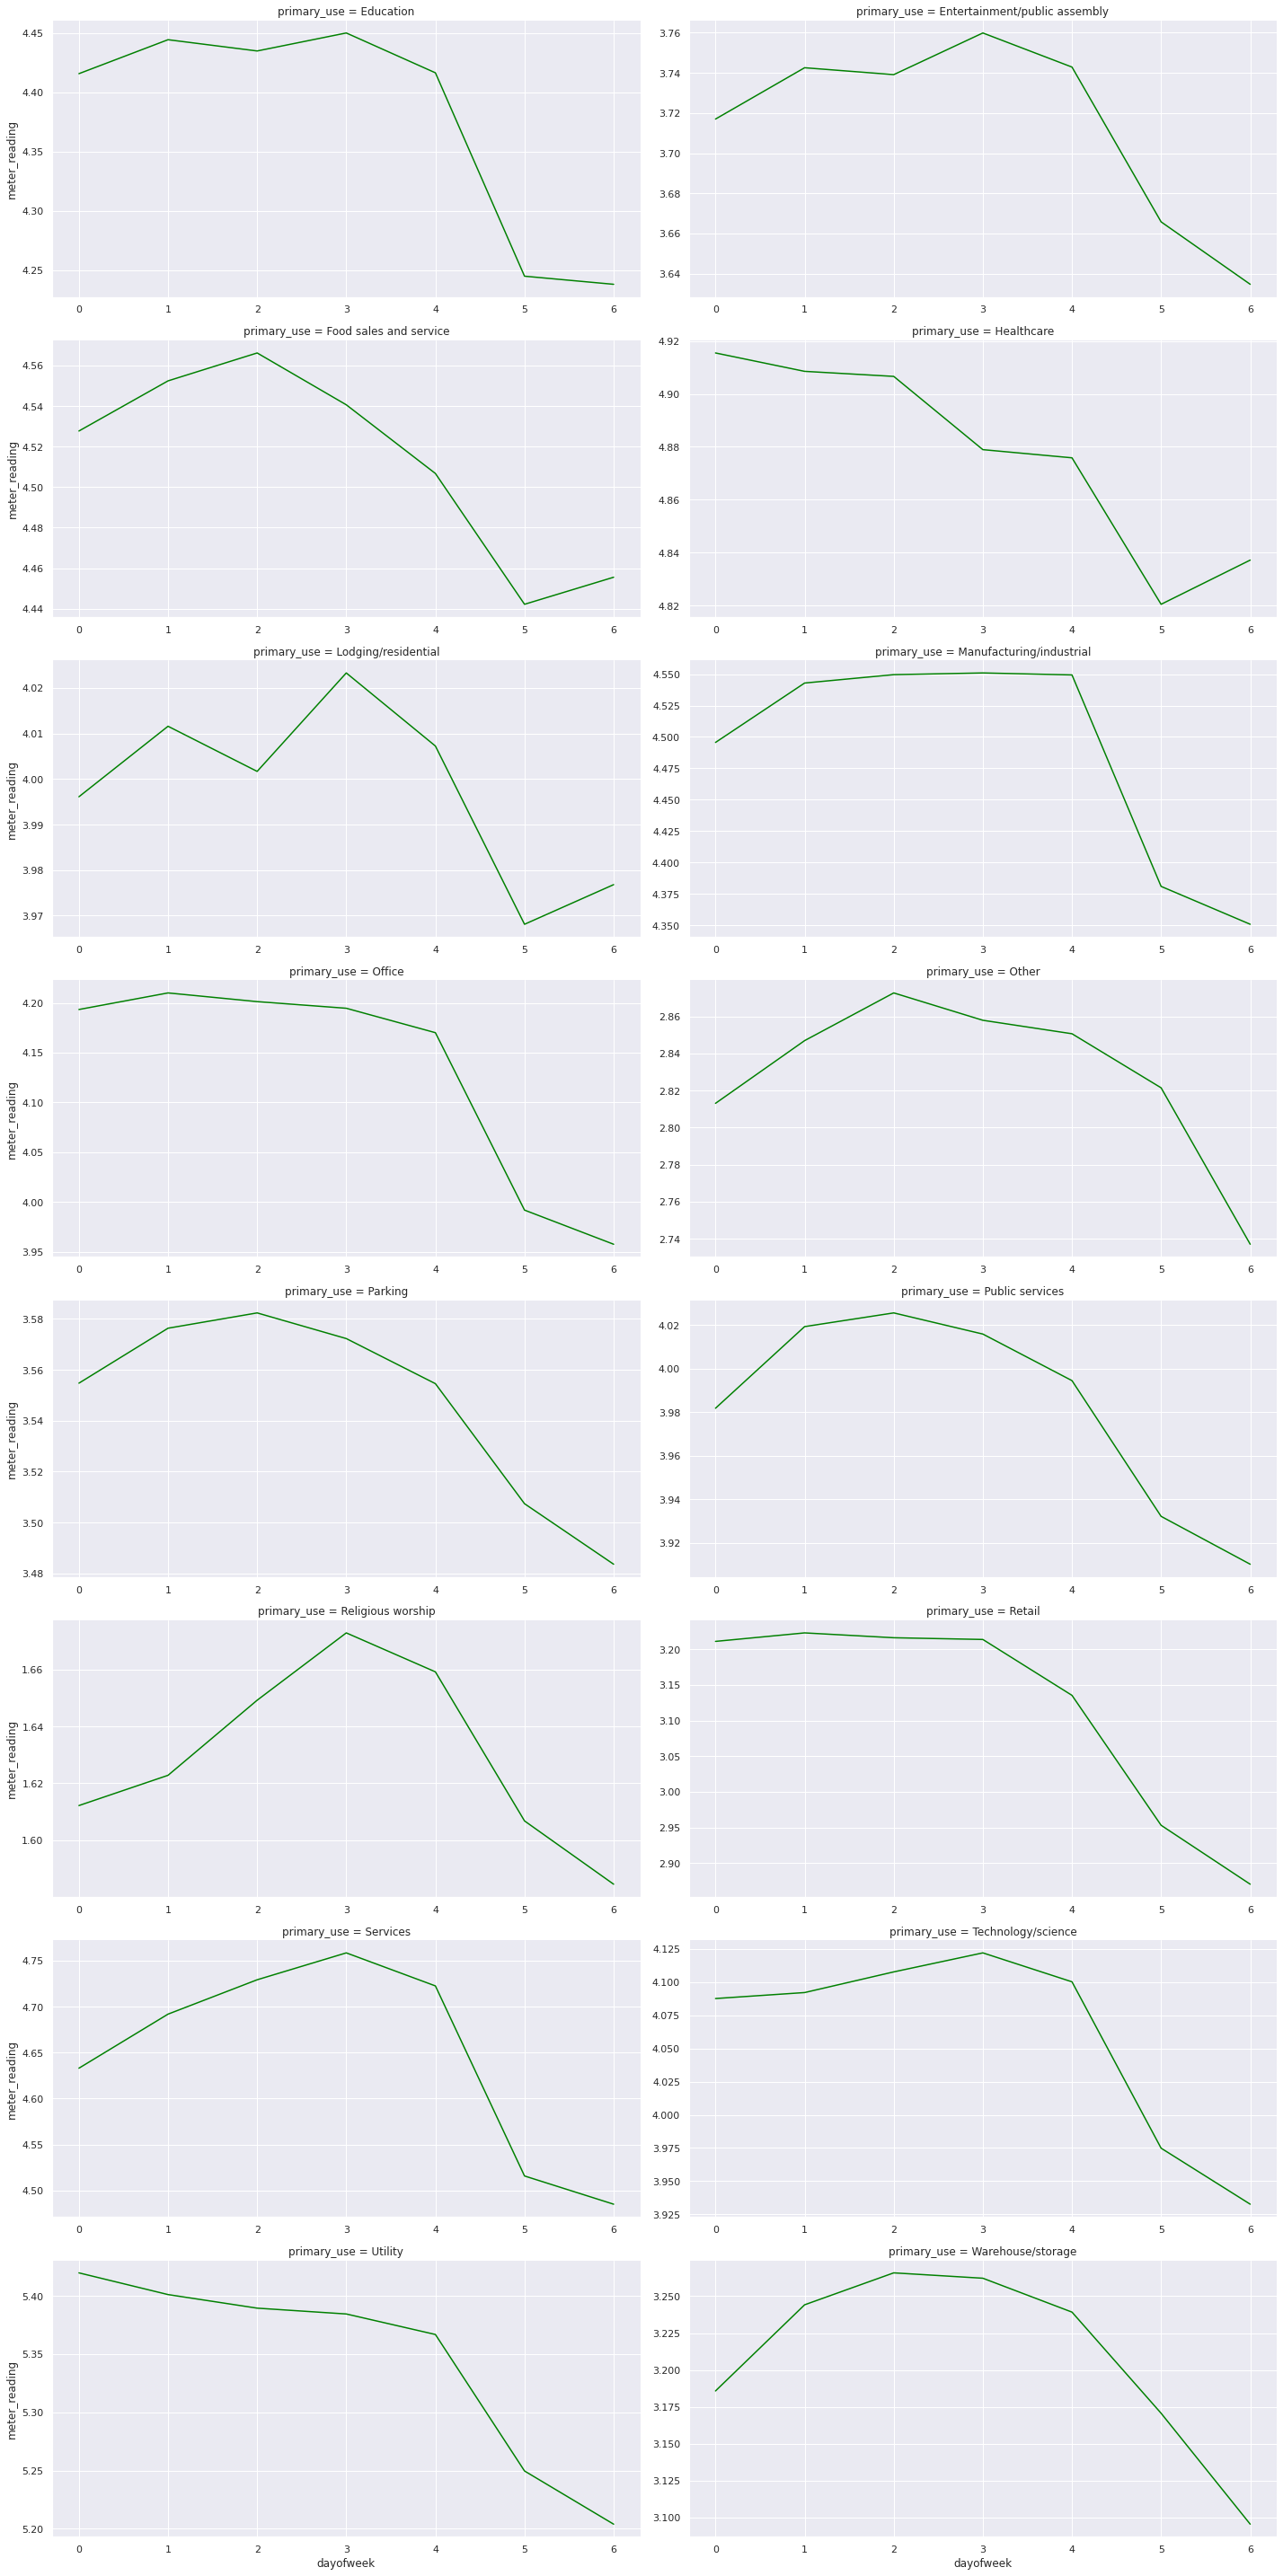

In [80]:
#Pengamatan penggunaan daya pekanan (dilihat dari rataan penggunaan tiap harinya berdasarkan tipe bangunan/pemakaian utama)
day_use_df= df_all_Train.groupby(['dayofweek', 'primary_use']).meter_reading.mean().reset_index()
p=sns.FacetGrid(day_use_df, col='primary_use', col_wrap=2, height=5, aspect=2, sharey=False, sharex=False)
p.map(sns.lineplot, 'dayofweek', 'meter_reading', color='green')
plt.show()

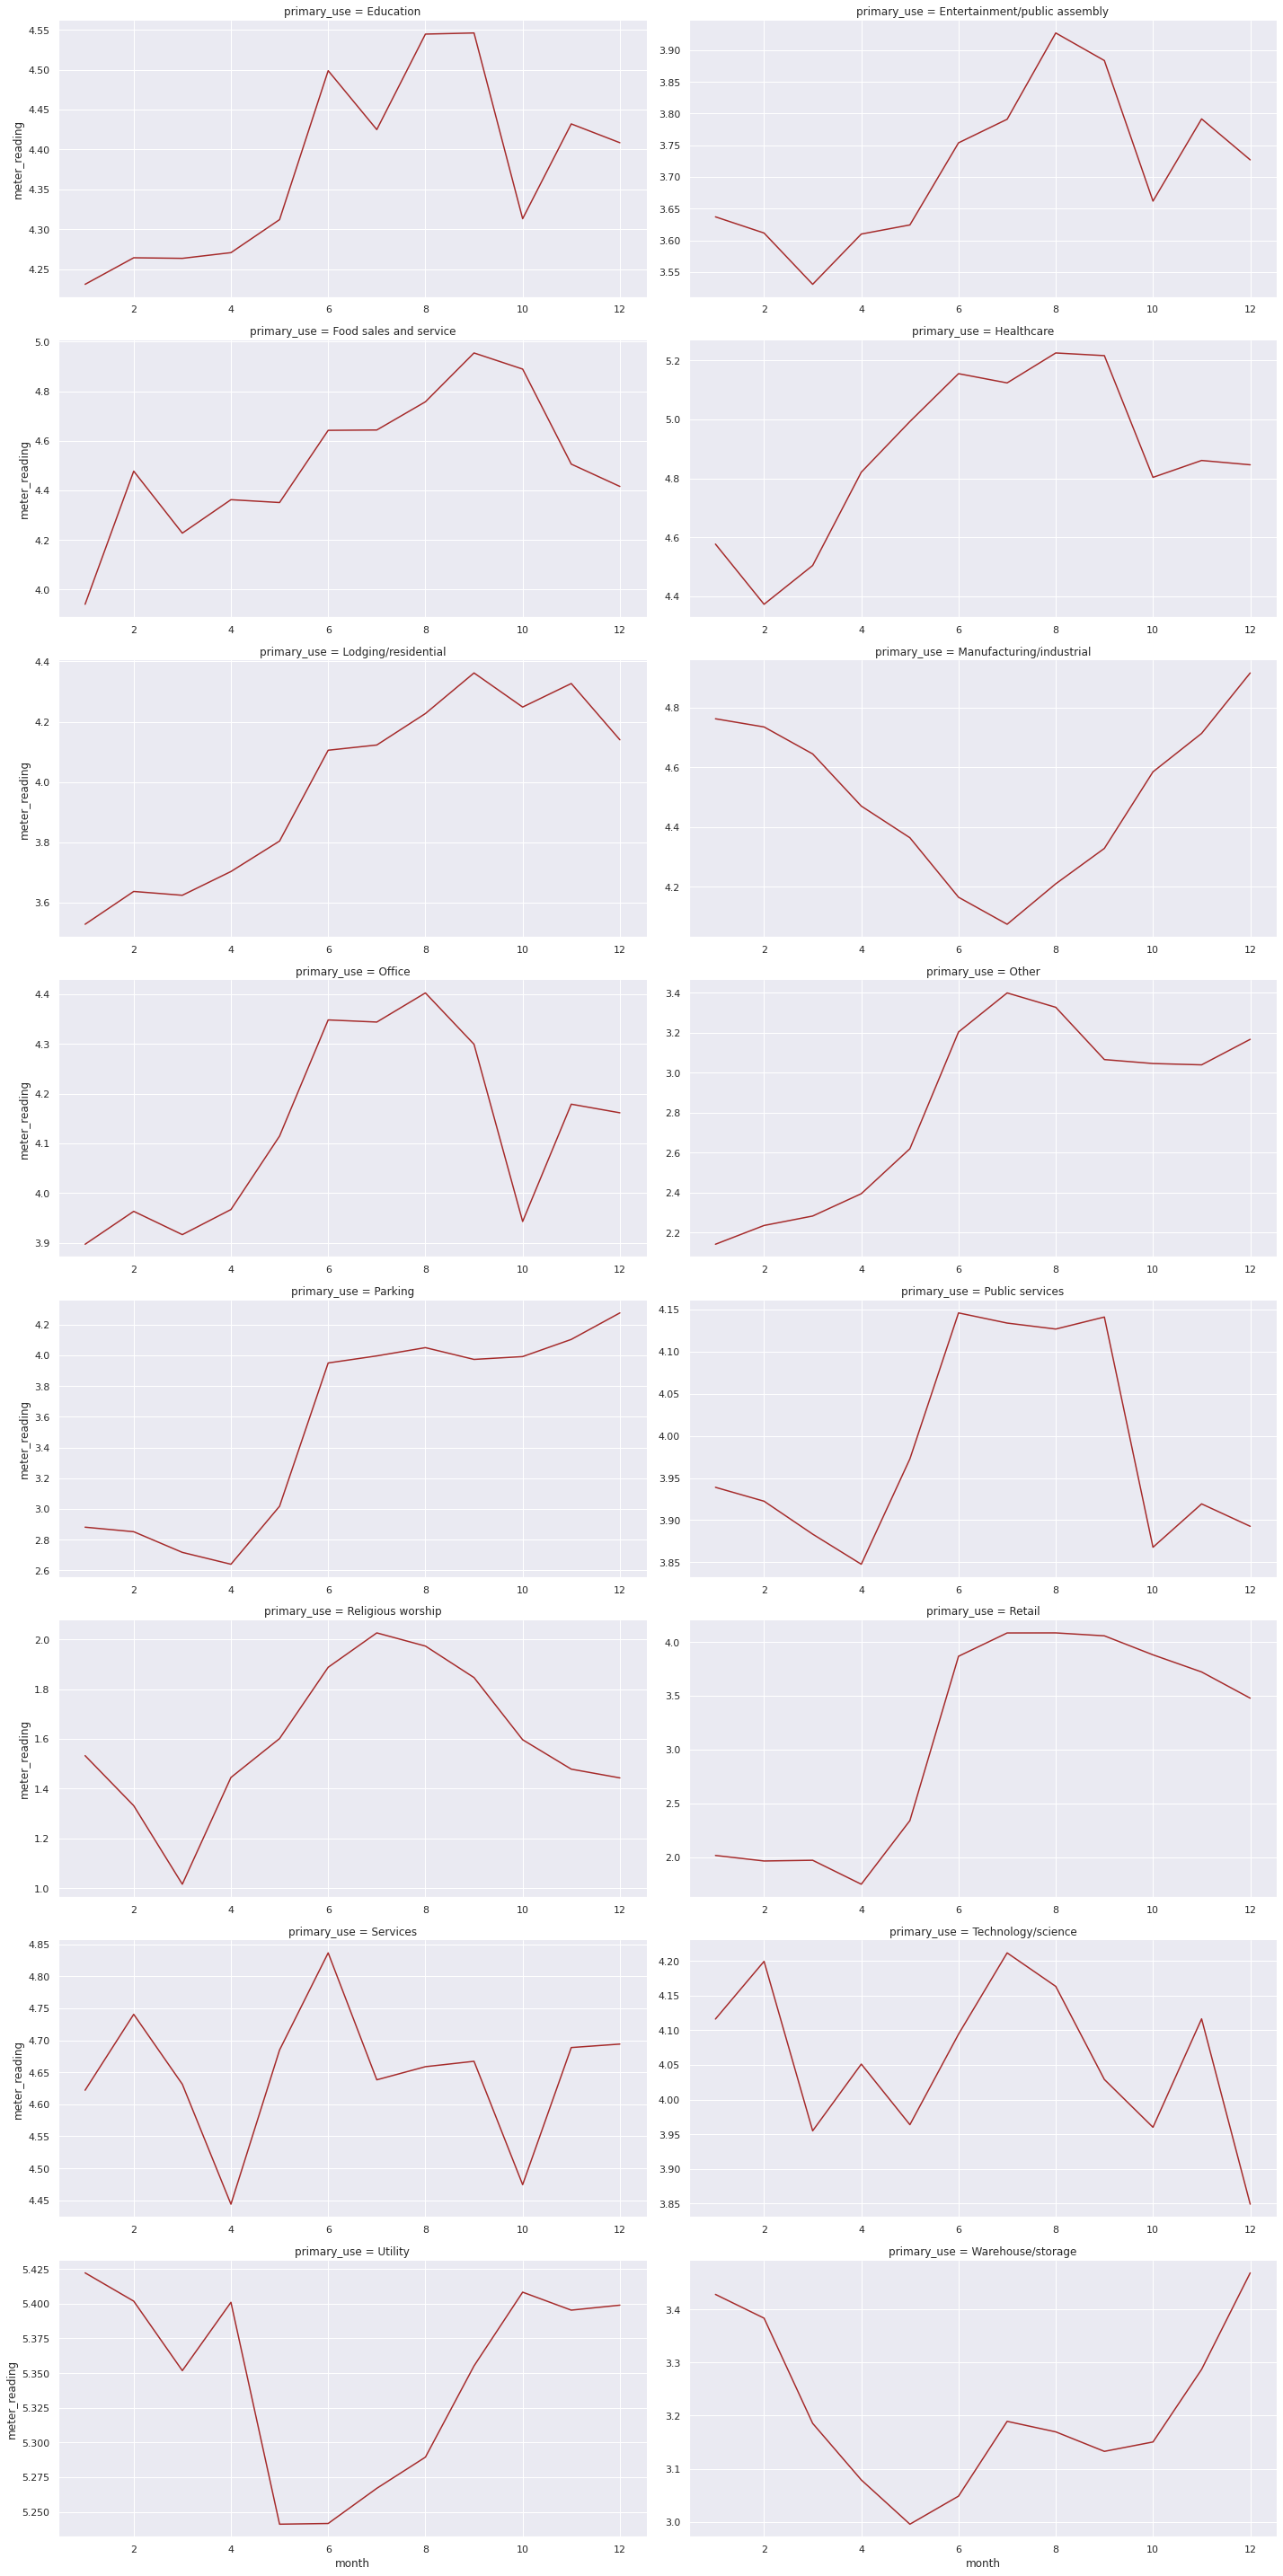

In [81]:
#Pengamatan penggunaan daya tahunan (dilihat dari rataan penggunaan tiap bulannyanya berdasarkan tipe bangunan/pemakaian utama)
day_use_df= df_all_Train.groupby(['month', 'primary_use']).meter_reading.mean().reset_index()
p=sns.FacetGrid(day_use_df, col='primary_use', col_wrap=2, height=5, aspect=2, sharey=False, sharex=False)
p.map(sns.lineplot, 'month', 'meter_reading', color='brown')
plt.show()

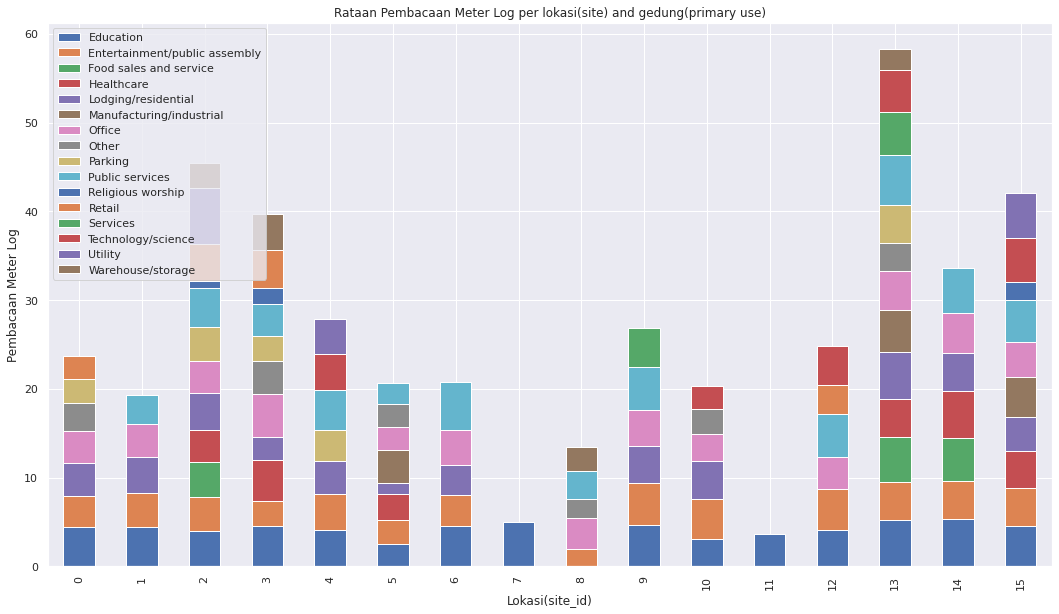

In [82]:
#Pengamatan penggunaan daya tiap gedung (primary_use) berdasarkan lokasi (site_id)
site_use_grouping = df_all_Train.groupby(['site_id','primary_use'])['meter_reading'].mean().unstack('primary_use')
site_use_grouping.plot(kind = 'bar', stacked = True, figsize=(18,10)).set_title("Rataan Pembacaan Meter Log per lokasi(site) and gedung(primary use)")
plt.xlabel('Lokasi(site_id)')
plt.ylabel('Pembacaan Meter Log')
plt.legend(loc = "upper left")
plt.show()

*   Lokasi ke-13 memiliki pembacaan meter rata-rata tertinggi.
*   Lokasi ke-11 memiliki pembacaan meter rata-rata paling rendah dan bangunan di lokasi ini hanya lembaga pendidikan


Selanjutnya kita akan melihat tiap distribusi dari data pada fitur-fitur lainnya dan juga melihat rataan penggunaan daya (pembacaan meter) terhadap fitur-fitur lain tersebut

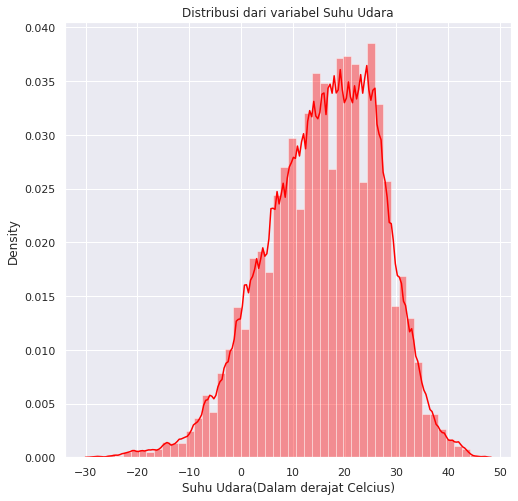

In [83]:
#Melihat distribusi dari suhu udara
plt.figure(figsize=(8,8))
sns.distplot(df_all_Train['air_temperature'].dropna(), color='red')
plt.xlabel("Suhu Udara(Dalam derajat Celcius)")
plt.title("Distribusi dari variabel Suhu Udara")
plt.show()

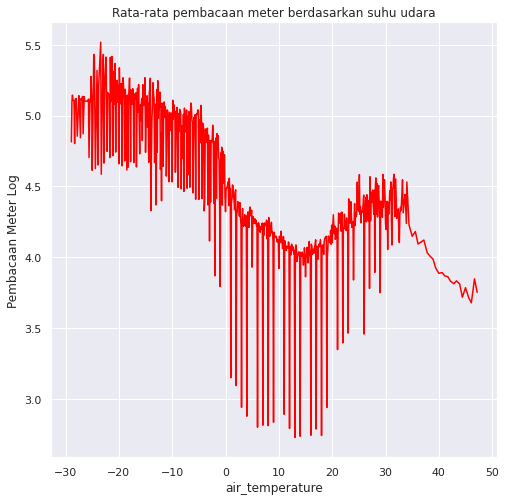

In [84]:
#Melihat pengaruh rataan penggunaan daya (pembacaan meter) terhadap suhu udara
plt.figure(figsize=(8,8))
temp_df= df_all_Train.groupby('air_temperature').meter_reading.mean().reset_index()
sns.lineplot(x=temp_df['air_temperature'], y=temp_df['meter_reading'], color='red')
plt.ylabel("Pembacaan Meter Log")
plt.title("Rata-rata pembacaan meter berdasarkan suhu udara")
plt.show()

Suhu udara terlihat memiliki distribusi normal. Pengamatan maksimum terletak antara 0-30 derajat C.
Pembacaan meter rata-rata tinggi disaat suhu negatif (kemungkinan pemakaian daya meningkat untuk mesin pemanas), dan kemudian cukup tinggi di saat suhu naik di atas 15 derajat C (kemungkinan pemakain Pendingin atau AC).

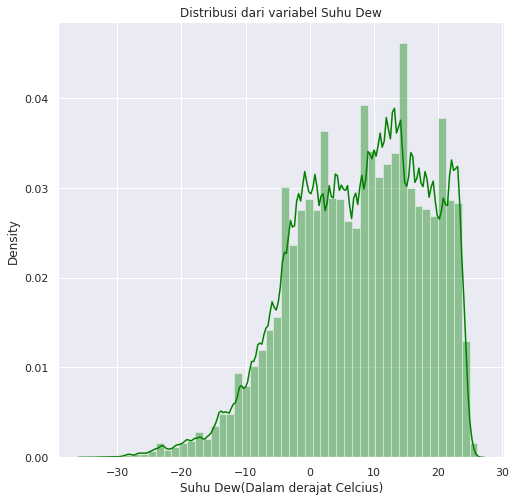

In [85]:
#Melihat distribusi dari suhu dew (dew temperature)
plt.figure(figsize=(8,8))
sns.distplot(df_all_Train['dew_temperature'].dropna(), color='green')
plt.xlabel("Suhu Dew(Dalam derajat Celcius)")
plt.title("Distribusi dari variabel Suhu Dew")
plt.show()

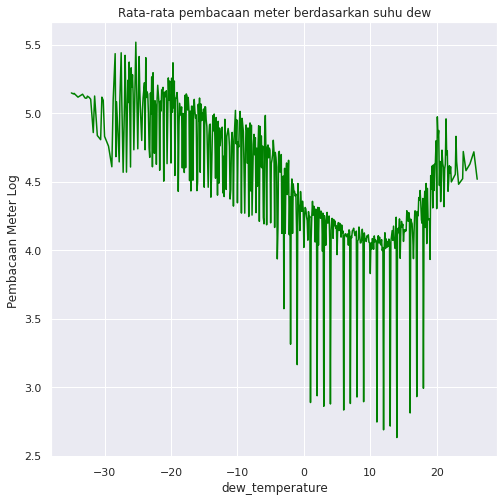

In [86]:
#Melihat pengaruh rataan penggunaan daya (pembacaan meter) terhadap suhu dew
plt.figure(figsize=(8,8))
temp_df= df_all_Train.groupby('dew_temperature').meter_reading.mean().reset_index()
sns.lineplot(x=temp_df['dew_temperature'], y=temp_df['meter_reading'], color='green')
plt.ylabel("Pembacaan Meter Log")
plt.title("Rata-rata pembacaan meter berdasarkan suhu dew")
plt.show()

Suhu dew terlihat memiliki distribusi dengan skew ke kiri. Pengamatan maksimum terletak antara 0-20 derajat C.
Seperti pada hubungan rataan pembacaan dengan suhu udara, pembacaan meter pada suhu dew juga memiliki rata-rata tinggi disaat suhu negatif, dan kemudian cukup tinggi di saat suhu naik di atas 15 derajat C

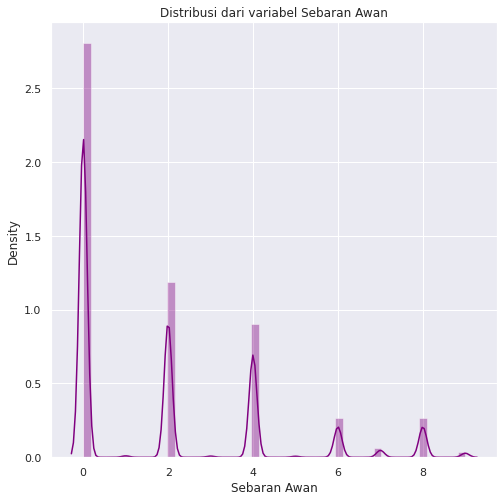

In [87]:
#Melihat distribusi dari Sebaran Awan
plt.figure(figsize=(8,8))
sns.distplot(df_all_Train['cloud_coverage'].dropna(), color='purple')
plt.xlabel("Sebaran Awan")
plt.title("Distribusi dari variabel Sebaran Awan")
plt.show()

Sebagian besar pengamatan memiliki sebaran awan sebagai 0. Ada banyak nilai yang hilang dalam sebaran awan. saat preprocessing nanti akan dilakukan imputasi

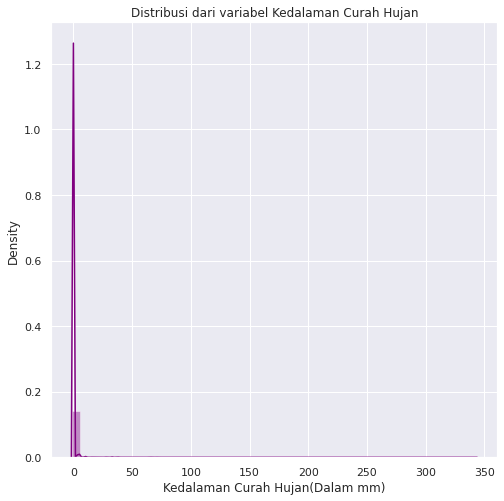

In [88]:
#Melihat distribusi dari Kedalaman Curah Hujan
plt.figure(figsize=(8,8))
sns.distplot(df_all_Train['precip_depth_1_hr'].dropna(), color='purple')
plt.xlabel("Kedalaman Curah Hujan(Dalam mm)")
plt.title("Distribusi dari variabel Kedalaman Curah Hujan")
plt.show()

Disteibusi data pada kedalaman curah hujan sangat miring(heavily skew) dengan kebanyakan data yang ada bernilai nol. Juga ada banyak nilai yang hilang (missing value) dalam variabel ini.

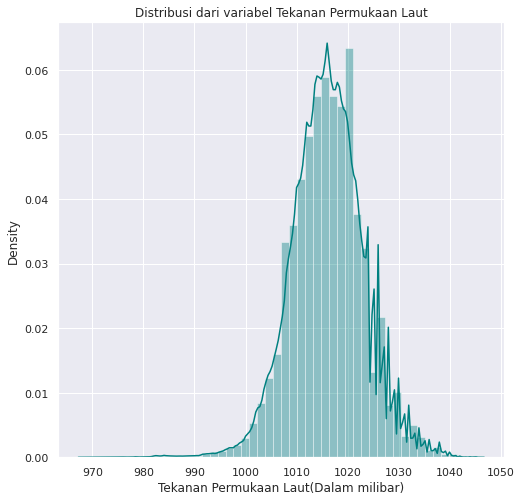

In [89]:
#Melihat distribusi dari Tekanan Permukaan Laut (sea_level_pressure)
plt.figure(figsize=(8,8))
sns.distplot(df_all_Train['sea_level_pressure'].dropna(), color='teal')
plt.xlabel("Tekanan Permukaan Laut(Dalam milibar)")
plt.title("Distribusi dari variabel Tekanan Permukaan Laut")
plt.show()

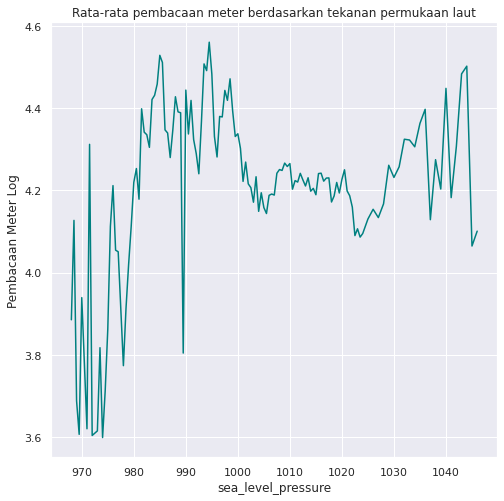

In [90]:
#Melihat pengaruh rataan penggunaan daya (pembacaan meter) terhadap tekanan permukaan laut
plt.figure(figsize=(8,8))
temp_df= df_all_Train.groupby('sea_level_pressure').meter_reading.mean().reset_index()
sns.lineplot(x=temp_df['sea_level_pressure'], y=temp_df['meter_reading'], color='teal')
plt.ylabel("Pembacaan Meter Log")
plt.title("Rata-rata pembacaan meter berdasarkan tekanan permukaan laut")
plt.show()

Data pada variabel tekanan permukaan laut ini mengikuti distribusi normal dengan maksimum pengamatan terletak antara 1000 hingga 1030 milibar

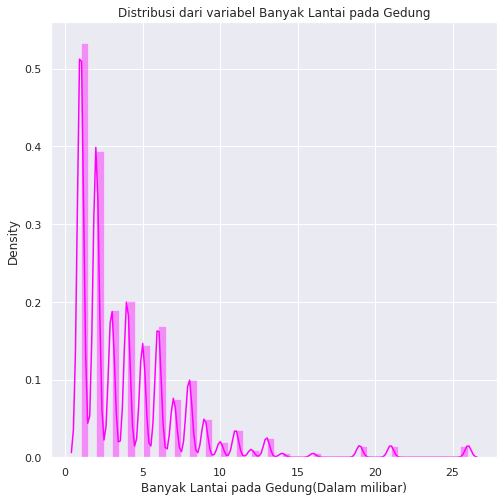

In [91]:
#Melihat distribusi dari Banyak Lantai pada Gedung (floor_count)
plt.figure(figsize=(8,8))
sns.distplot(df_all_Train['floor_count'].dropna(), color='magenta')
plt.xlabel("Banyak Lantai pada Gedung(Dalam milibar)")
plt.title("Distribusi dari variabel Banyak Lantai pada Gedung")
plt.show()

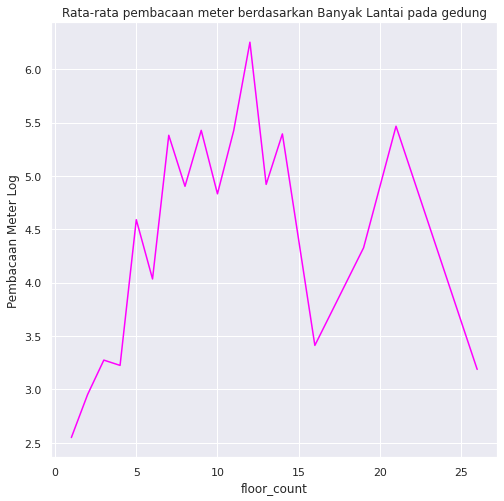

In [92]:
#Melihat pengaruh rataan penggunaan daya (pembacaan meter) terhadap Banyak Lantai pada gedung
plt.figure(figsize=(8,8))
temp_df= df_all_Train.groupby('floor_count').meter_reading.mean().reset_index()
sns.lineplot(x=temp_df['floor_count'], y=temp_df['meter_reading'], color='magenta')
plt.ylabel("Pembacaan Meter Log")
plt.title("Rata-rata pembacaan meter berdasarkan Banyak Lantai pada gedung")
plt.show()

Dari data banyak lantai, diketahui kebanyakan gedung berlantai < 9, hanya beberapa gedung saja yang memiliki lantai >= 10.
Penggunaan daya (pembacaan meter) cenderung naik untuk tiap lantai, tapi beberapa terlihat turun, kemungkinan ruangan kosong/tidak terpakai pada gedung tersebut

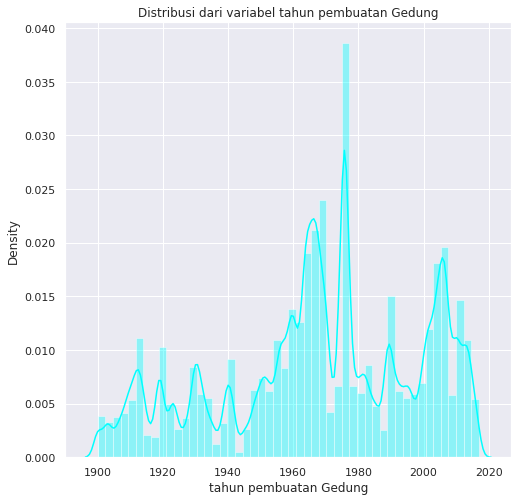

In [93]:
#Melihat distribusi dari tahun pembuatan Gedung (year_built)
plt.figure(figsize=(8,8))
sns.distplot(df_all_Train['year_built'].dropna(), color='cyan')
plt.xlabel("tahun pembuatan Gedung")
plt.title("Distribusi dari variabel tahun pembuatan Gedung")
plt.show()

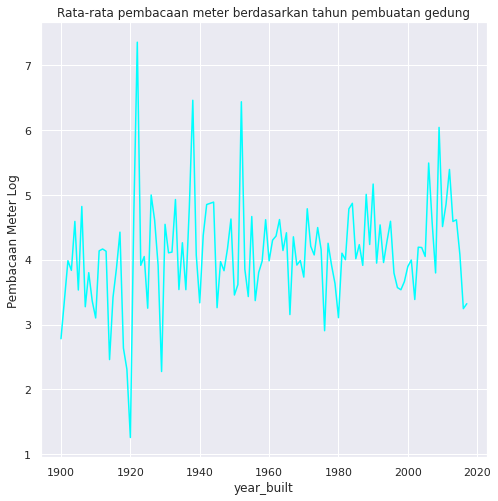

In [94]:
#Melihat pengaruh rataan penggunaan daya (pembacaan meter) terhadap tahun pembuatan gedung
plt.figure(figsize=(8,8))
temp_df= df_all_Train.groupby('year_built').meter_reading.mean().reset_index()
sns.lineplot(x=temp_df['year_built'], y=temp_df['meter_reading'], color='cyan')
plt.ylabel("Pembacaan Meter Log")
plt.title("Rata-rata pembacaan meter berdasarkan tahun pembuatan gedung")
plt.show()

Distribusi tahun pembuatan dari gedung yang di data tersebar dalam kurun waktu 120 tahun. Sebagian besar bangunan dibangun setelah tahun 1960.
Konsumsi daya rata-rata lebih tinggi untuk bangunan yang dibangun sebelum tahun 1940

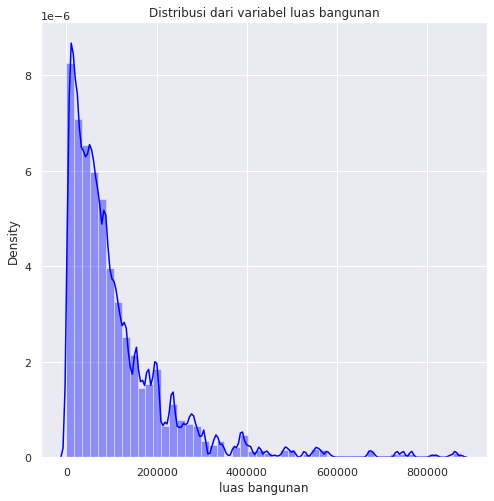

In [95]:
#Melihat distribusi dari luas bangunan (square_feet)
plt.figure(figsize=(8,8))
sns.distplot(df_all_Train['square_feet'].dropna(), color='blue')
plt.xlabel("luas bangunan")
plt.title("Distribusi dari variabel luas bangunan")
plt.show()

Karena luas bangunan memiliki skewness sangat miring dan skala nilainya juga sangat besar, maka akan diterapkan transformasi log di sini dan memplot ulang distribusinya.

In [96]:
#transformasi log untuk variabel luas bangunan (square_feet)
df_all_Train['square_feet']=np.log1p(df_all_Train['square_feet'])

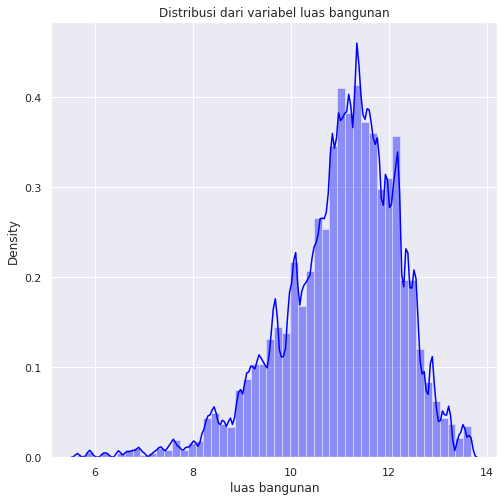

In [97]:
#Melihat distribusi dari luas bangunan (square_feet)
plt.figure(figsize=(8,8))
sns.distplot(df_all_Train['square_feet'].dropna(), color='blue')
plt.xlabel("luas bangunan")
plt.title("Distribusi dari variabel luas bangunan")
plt.show()

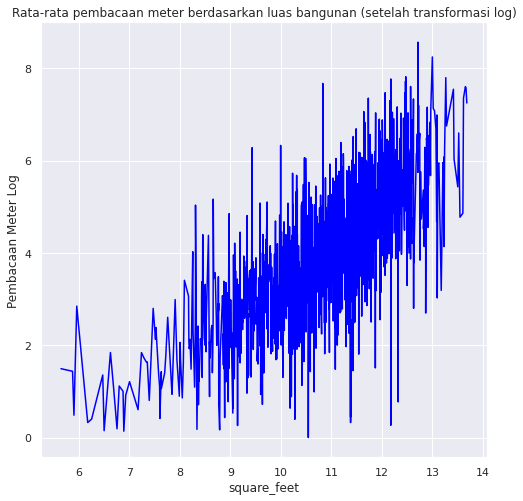

In [98]:
#Setelah luas bangunan sudah ditransformasi dengan ltransformasi log, maka
#sekarang dilihat pengaruh rataan penggunaan daya (pembacaan meter) terhadap luas bangunan (setelah transformasi log)
plt.figure(figsize=(8,8))
temp_df= df_all_Train.groupby('square_feet').meter_reading.mean().reset_index()
sns.lineplot(x=temp_df['square_feet'], y=temp_df['meter_reading'], color='blue')
plt.ylabel("Pembacaan Meter Log")
plt.title("Rata-rata pembacaan meter berdasarkan luas bangunan (setelah transformasi log)")
plt.show()

Setelah luas bangunan kita transformasi log, maka terlihat ada hubungan positif yang jelas antara keduanya. Dengan bertambahnya ukuran bangunan, pemakaian daya (pembacaan meteran) juga meningkat.

# **Melihat Missing Value pada fitur/variabel data frame**

In [99]:
missing_values = pd.DataFrame(df_all_Train.isnull().sum() * 100 / len(df_all_Train))
missing_values.columns = ["Missing Values"]

missing_values = missing_values[missing_values["Missing Values"] != 0]
missing_values.sort_values(by = "Missing Values", axis = 0, ascending = False, inplace = True)

missing_values

,Missing Values
floor_count,82.652772
year_built,59.990033
cloud_coverage,43.655131
precip_depth_1_hr,18.544739
wind_direction,7.167792
sea_level_pressure,6.092515
wind_speed,0.710701
dew_temperature,0.495348
air_temperature,0.478124


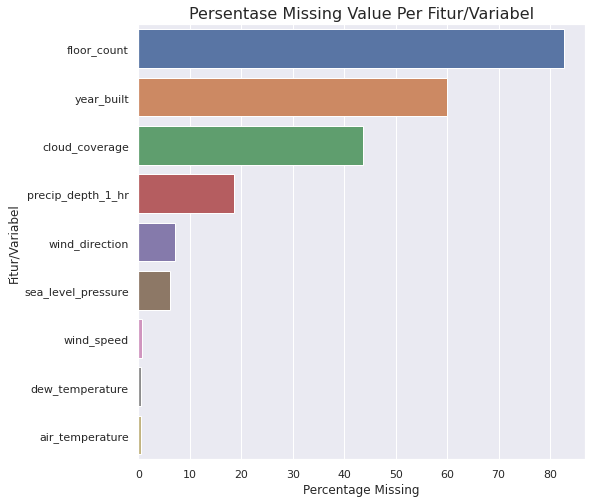

In [100]:
plt.figure(figsize=(8,8))
sns.barplot(x = missing_values['Missing Values'], y = missing_values.index).set_title("Persentase Missing Value Per Fitur/Variabel", fontsize=16)
plt.xlabel('Percentage Missing', fontsize=12)
plt.ylabel('Fitur/Variabel', fontsize=12)
plt.show()

Fitur/variabel Banyak Lantai(floor_count) dan tahun pembuatan (year_built) memiliki missing value lebih dari 50%, oleh karena itu nantinya dalam proses *Feature Engineering* kedua fitur/variabel ini kita hapus, sedangkan untuk fitur/variabel lainnya akan dilakukan imputasi dengan mengisi data yang kosong dengan median tiap fitur/variabel

# **Melihat Matriks Korelasi antar Fitur/Variabel**

Text(0.5, 1.0, 'Matriks Korelasi')

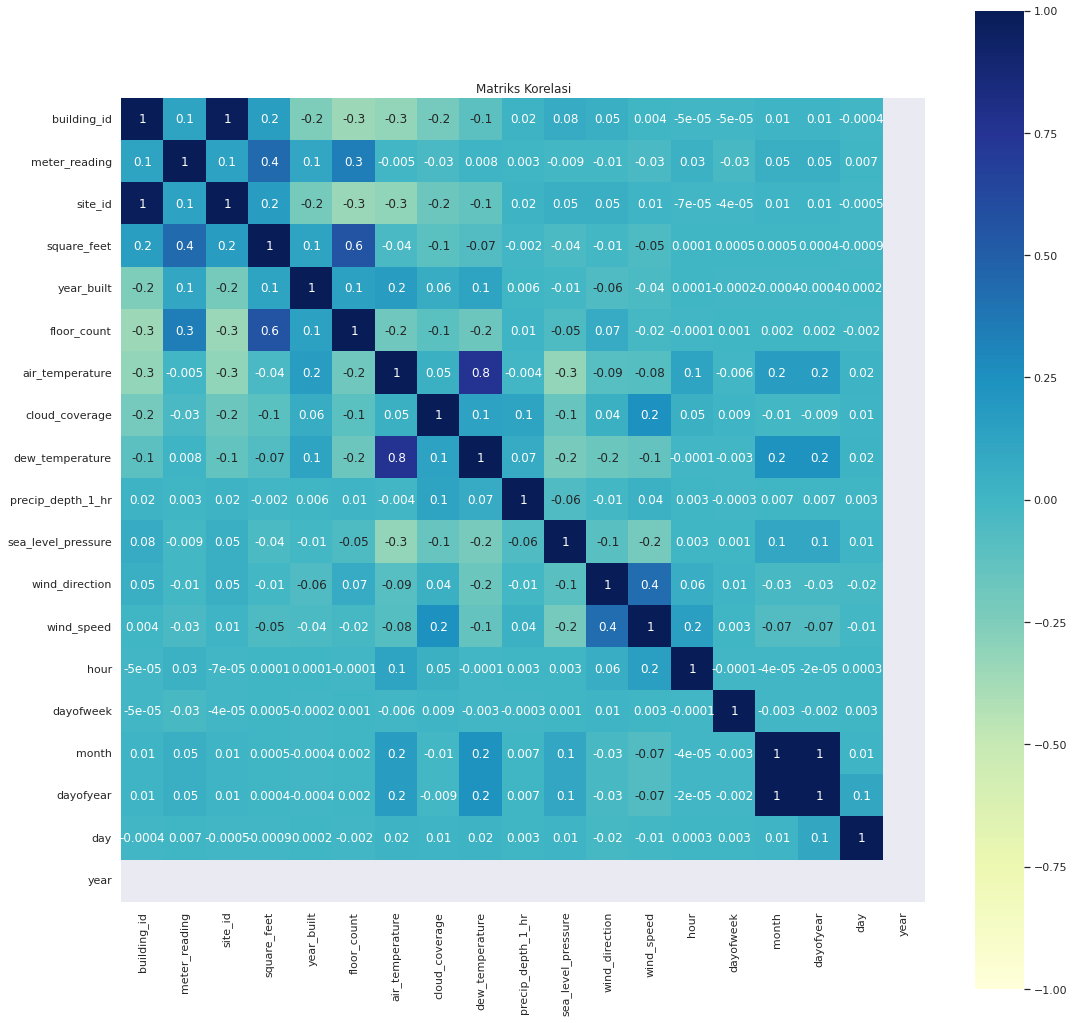

In [101]:
#Matriks Korelasi
plt.figure(figsize=(18,18))
sns.heatmap(df_all_Train.corr(), annot=True, fmt='.1g', vmin=-1, vmax=1, center=0, square=True, cmap='YlGnBu')
plt.title('Matriks Korelasi')

In [102]:
target_corr_df = pd.DataFrame(df_all_Train.corr()["meter_reading"].sort_values(ascending=False))
target_corr_df 

,meter_reading
meter_reading,1.000000
square_feet,0.444651
floor_count,0.342052
site_id,0.139902
building_id,0.126395
year_built,0.103332
dayofyear,0.047776
month,0.047386
hour,0.033277
dew_temperature,0.008358


Terlihat bahwa tidak ada korelasi yang cukup kuat antara pembacaan meter (meter_reading) dengan fitur/variabel lainnya.

# **6. Melakukan Feature Engineering**

Pada tahapan ini dilakukan proses
1.   Treatmen terhadap outlier
2.   Menghapus baris dengan pembacaan nol meter karena dapat menunjukkan pembacaan yang tidak akurat atau tidak tersedia.
3. Menghapus kolom/fitur/variabel dengan *missing-value* lebih dari 50%
4. Mengisi nilai yang hilang menggunakan median dari kolom/fitur/variabel.
5. Menambahkan fitur baru.
6. Encoding data (mengubah data kategorik menjadi numerik)

**6.1 Treatment terhadap outlier**

Sebelumnya dari plot rataan pembacaan daya berdasarkan ID gedung pada gedung dengan 1099 pembacaan sangat tinggi, ini kita anggap outlier

In [103]:
df_all_Train[df_all_Train['building_id']==1099]['meter_reading'].describe()

count    17566.000000
mean         8.564197
std          3.608276
min          4.976734
25%          6.256500
50%          6.894363
75%          8.854950
max         16.902212
Name: meter_reading, dtype: float64

In [104]:
#menghapus data pengamatan untuk ID bangunan 1099
drop_indices= list(df_all_Train[df_all_Train['building_id']==1099].index)
df_all_Train.drop(drop_indices, axis=0, inplace=True)

In [105]:
#Mengamati apakah ada outlier lain pada pembacaan meter (meter_reading) dengan melihat pembacaan terbesar lainnya
print(df_all_Train[df_all_Train.meter_reading == df_all_Train.meter_reading.max()])

          building_id       meter           timestamp  meter_reading  site_id  \
13851463          778  Air Dingin 2016-09-09 17:00:00      13.688104        6   

                            primary_use  square_feet  year_built  floor_count  \
13851463  Entertainment/public assembly     11.59303         NaN          NaN   

          air_temperature  ...  precip_depth_1_hr  sea_level_pressure  \
13851463         33.90625  ...                0.0              1014.5   

          wind_direction  wind_speed  hour  dayofweek  month  dayofyear  day  \
13851463             NaN         NaN    17          4      9        253    9   

          year  
13851463  2016  

[1 rows x 22 columns]


In [106]:
#Terbesar selanjutnya adalah gedung dengan ID gedung 778, kita lihat deskripsi datanya
df_all_Train[df_all_Train['building_id']==778]['meter_reading'].describe()

count    16860.000000
mean         3.487550
std          3.450661
min          0.000000
25%          0.000000
50%          5.066700
75%          5.585844
max         13.688104
Name: meter_reading, dtype: float64

In [107]:
#Sepertinya ini outlier, jika dibandingkan dengan plot awalmenghapus data pengamatan untuk ID bangunan 778
drop_indices= list(df_all_Train[df_all_Train['building_id']==778].index)
df_all_Train.drop(drop_indices, axis=0, inplace=True)

In [108]:
#Mengamati apakah ada outlier lain pada pembacaan meter (meter_reading) dengan melihat pembacaan terbesar lainnya
print(df_all_Train[df_all_Train.meter_reading == df_all_Train.meter_reading.max()])

          building_id       meter           timestamp  meter_reading  site_id  \
14679956         1088  Air Dingin 2016-09-24 09:00:00      12.784485       13   

         primary_use  square_feet  year_built  floor_count  air_temperature  \
14679956   Education    12.569309         NaN          NaN        18.296875   

          ...  precip_depth_1_hr  sea_level_pressure  wind_direction  \
14679956  ...                0.0              1019.0           140.0   

          wind_speed  hour  dayofweek  month  dayofyear  day  year  
14679956    4.101562     9          5      9        268   24  2016  

[1 rows x 22 columns]


In [109]:
df_all_Train[df_all_Train['building_id']==1088]['meter_reading'].describe()

count    26336.000000
mean         7.604514
std          1.825624
min          0.000000
25%          6.488064
50%          7.965938
75%          8.781313
max         12.784485
Name: meter_reading, dtype: float64

Data pada ID gedung 1088 diasumsikan bukan outlier karena bangunan tersebut merupakan bangunan edukasi (dari pengamatan sebelumnya penggunaan daya dari bangunan edukasi memang besar).

**6.2 Menghapus baris dengan pembacaan nol meter karena dapat menunjukkan pembacaan yang tidak akurat atau tidak tersedia.**

In [110]:
pembacaan_meter_nol = list(df_all_Train[df_all_Train['meter_reading'] == 0].index)
df_all_Train.drop(pembacaan_meter_nol, axis = 0, inplace = True)

In [111]:
print('Bentuk baru dari Data Train:',df_all_Train.shape)

Bentuk baru dari Data Train: (18314942, 22)


**6.3 Menghapus kolom/fitur/variabel dengan *missing-value* lebih dari 50%**

In [112]:
threshold = len(df_all_Train) * 0.5
df_all_Train.dropna(axis=1, thresh = threshold, inplace = True)

In [113]:
print('Bentuk baru dari Data Train:',df_all_Train.shape)

Bentuk baru dari Data Train: (18314942, 20)


**6.4 Mengisi nilai yang hilang menggunakan median dari kolom/fitur/variabel.**

untuk mengetahui metode yang tepat dalam missing value maka kita lihat dulu deskripsi dari masing-masing fitur/variabel yang memiliki missing value terlebih dahulu.
setelah kita hapus floor_count dan year_built, maka fitur/variabel yang masih memiliki missing value adalah = cloud_coverage,precip_depth_1_hr, wind_direction, sea_level_pressure, wind_speed, dew_temperature, dan air_temperature

In [114]:
fitur_missing_value = ['cloud_coverage','precip_depth_1_hr', 'wind_direction', 'sea_level_pressure', 'wind_speed', 'dew_temperature', 'air_temperature']
df_all_Train[fitur_missing_value].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
cloud_coverage,10351087.0,NaN,0.0,0.00000,0.000000,0.000000,4.000000,9.00000
precip_depth_1_hr,14793084.0,NaN,NaN,-1.00000,0.000000,0.000000,0.000000,343.00000
wind_direction,16990067.0,NaN,NaN,0.00000,70.000000,180.000000,280.000000,360.00000
sea_level_pressure,17127556.0,NaN,NaN,968.00000,1011.500000,1016.000000,1020.500000,1046.00000
wind_speed,18182415.0,NaN,0.0,0.00000,2.099609,3.099609,4.601562,19.00000
dew_temperature,18222416.0,NaN,0.0,-35.00000,0.600098,8.898438,16.093750,26.09375
air_temperature,18225511.0,NaN,0.0,-28.90625,8.898438,16.703125,24.296875,47.18750


In [115]:
#Karena Meannya berupa NaN, maka missing value yang akan dilakukan dengan mengimputasinya dengan nilai Median
df_all_Train['cloud_coverage'].fillna(df_all_Train['cloud_coverage'].median(), inplace=True)
df_all_Train['sea_level_pressure'].fillna(df_all_Train['sea_level_pressure'].median(), inplace=True)
df_all_Train['precip_depth_1_hr'].fillna(df_all_Train['precip_depth_1_hr'].median(), inplace=True)
df_all_Train['wind_direction'].fillna(df_all_Train['wind_direction'].median(), inplace=True)
df_all_Train['wind_speed'].fillna(df_all_Train['wind_speed'].median(), inplace=True)
df_all_Train['dew_temperature'].fillna(df_all_Train['dew_temperature'].median(), inplace=True)
df_all_Train['air_temperature'].fillna(df_all_Train['air_temperature'].median(), inplace=True)

In [116]:
df_all_Train.isnull().sum() / len(df_all_Train)

building_id           0.0
meter                 0.0
timestamp             0.0
meter_reading         0.0
site_id               0.0
primary_use           0.0
square_feet           0.0
air_temperature       0.0
cloud_coverage        0.0
dew_temperature       0.0
precip_depth_1_hr     0.0
sea_level_pressure    0.0
wind_direction        0.0
wind_speed            0.0
hour                  0.0
dayofweek             0.0
month                 0.0
dayofyear             0.0
day                   0.0
year                  0.0
dtype: float64

In [117]:
df_all_Train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18314942 entries, 45 to 20216099
Data columns (total 20 columns):
 #   Column              Dtype   
---  ------              -----   
 0   building_id         int16   
 1   meter               object  
 2   timestamp           category
 3   meter_reading       float32 
 4   site_id             int8    
 5   primary_use         category
 6   square_feet         float64 
 7   air_temperature     float16 
 8   cloud_coverage      float16 
 9   dew_temperature     float16 
 10  precip_depth_1_hr   float16 
 11  sea_level_pressure  float16 
 12  wind_direction      float16 
 13  wind_speed          float16 
 14  hour                uint8   
 15  dayofweek           uint8   
 16  month               uint8   
 17  dayofyear           uint16  
 18  day                 uint16  
 19  year                uint16  
dtypes: category(2), float16(7), float32(1), float64(1), int16(1), int8(1), object(1), uint16(3), uint8(3)
memory usage: 995.9+ MB


Text(0.5, 1.0, 'Matriks Korelasi')

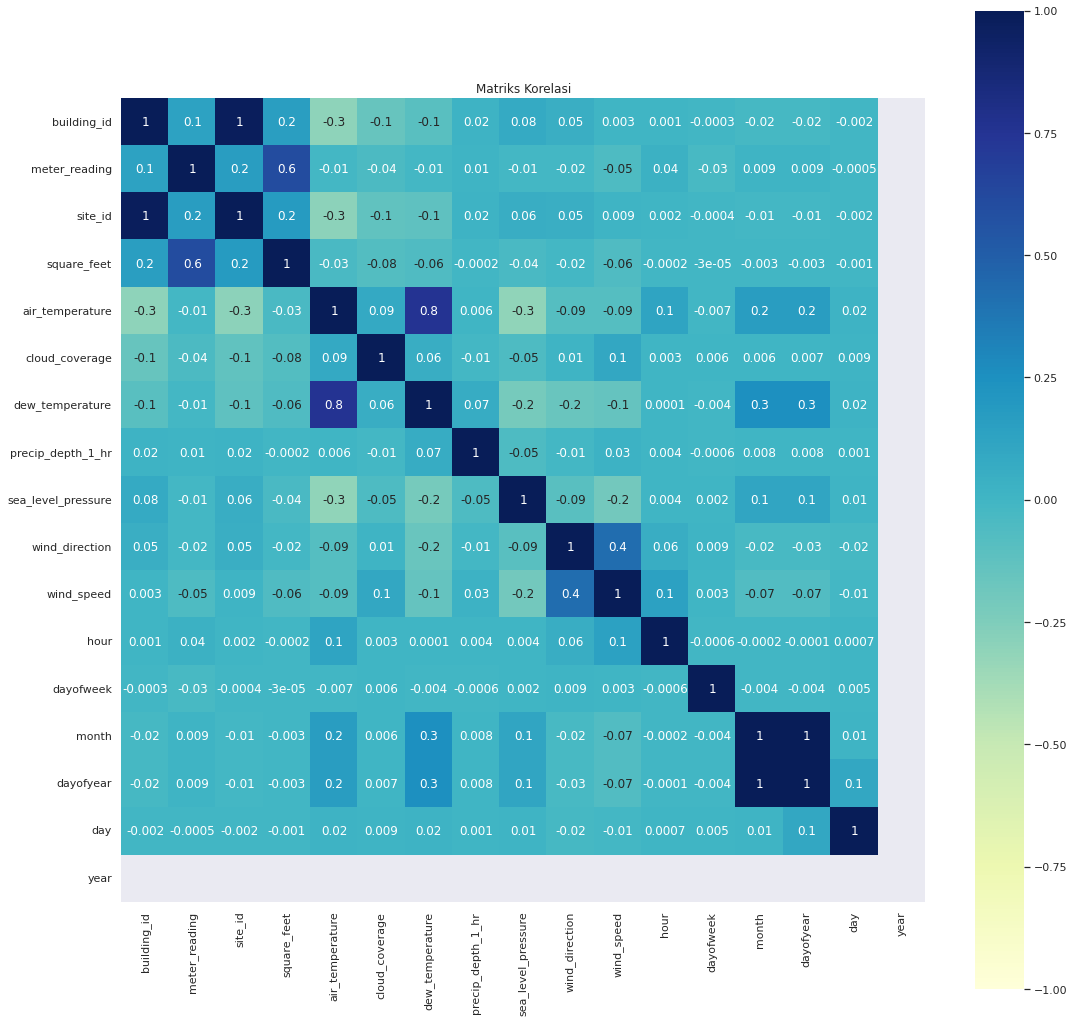

In [118]:
#Matriks Korelasi
plt.figure(figsize=(18,18))
sns.heatmap(df_all_Train.corr(), annot=True, fmt='.1g', vmin=-1, vmax=1, center=0, square=True, cmap='YlGnBu')
plt.title('Matriks Korelasi')

In [120]:
df_all_Train.to_csv('/content/Data_Hasil.csv', encoding='utf8')